<a href="https://colab.research.google.com/github/semenko/liquid-cell-atlas/blob/main/corr_heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyBigWig pybedtools gunzip bedparse deeptools pyGenomeTracks
!apt install bedtools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 12.5 MB 13.3 MB/s 
     |████████████████████████████████| 233 kB 10.0 MB/s 
     |████████████████████████████████| 112 kB 40.2 MB/s 
     |████████████████████████████████| 15.1 MB 30.6 MB/s 
     |████████████████████████████████| 11.2 MB 9.6 MB/s 
     |████████████████████████████████| 51 kB 784 kB/s 
     |████████████████████████████████| 41 kB 131 kB/s 
     |████████████████████████████████| 957 kB 38.2 MB/s 
     |████████████████████████████████| 3.2 MB 44.4 MB/s 
     |████████████████████████████████| 100 kB 9.1 MB/s 
     |████████████████████████████████| 121 kB 36.8 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 90 kB 10.2 MB/s 
     |████████████████████████████████| 103 kB 48.9 MB/s 
     |████████████████████████████████|

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 577 kB of archives.
After this operation, 2,040 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 bedtools amd64 2.26.0+dfsg-5 [577 kB]
Fetched 577 kB in 1s (513 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../bedtools_2.26.0+dfsg-5_amd64.deb ...
Unpacking bedtools (2.26.0+dfsg-5) ...
Setting up bedtools (2.26.0+dfsg-5) ...


In [2]:
import pandas as pd
import io
import numpy as np
import csv
import os
import pandas as pd

from IPython.display import Image

import pyBigWig
import pybedtools

In [3]:
! wget 'http://dcc.blueprint-epigenome.eu/data/blueprint_files.tsv'
data_tsv = pd.read_csv('blueprint_files.tsv', sep='\t')

noDisease_bw_data = data_tsv[(data_tsv['Disease'] == 'None') & 
                             (data_tsv['Format'] == 'bigWig') & 
                             (data_tsv['Experiment'] == 'Bisulfite-Seq')]

--2022-08-30 18:55:29--  http://dcc.blueprint-epigenome.eu/data/blueprint_files.tsv
Resolving dcc.blueprint-epigenome.eu (dcc.blueprint-epigenome.eu)... 193.62.192.83, 193.62.193.83
Connecting to dcc.blueprint-epigenome.eu (dcc.blueprint-epigenome.eu)|193.62.192.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4341342 (4.1M) [text/tab-separated-values]
Saving to: ‘blueprint_files.tsv’

blueprint_files.tsv 100%[===================>]   4.14M   832KB/s    in 5.1s    

2022-08-30 18:55:35 (832 KB/s) - ‘blueprint_files.tsv’ saved [4341342/4341342]



In [4]:
! wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_40/gencode.v40.annotation.gtf.gz
! gunzip gencode.v40.annotation.gtf.gz
! bedparse gtf2bed <gencode.v40.annotation.gtf> output.bed --extraFields gene_id,gene_name
output_bed = pybedtools.BedTool("output.bed")

os.remove("gencode.v40.annotation.gtf")

--2022-08-30 18:55:36--  https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_40/gencode.v40.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48043727 (46M) [application/x-gzip]
Saving to: ‘gencode.v40.annotation.gtf.gz’

gencode.v40.annotat 100%[===================>]  45.82M  12.9MB/s    in 3.8s    

2022-08-30 18:55:40 (12.0 MB/s) - ‘gencode.v40.annotation.gtf.gz’ saved [48043727/48043727]



In [5]:
cell_types = noDisease_bw_data['Cell type'].unique()

cell_type_1 = 'naive B cell'
cell_type_2 = 'plasma cell'

assert cell_type_1 in cell_types, "{} not a valid cell type".format(cell_type_1)
assert cell_type_2 in cell_types, "{} not a valid cell type".format(cell_type_2)

cell1_data = noDisease_bw_data[noDisease_bw_data['Cell type'] == cell_type_1]
cell2_data = noDisease_bw_data[noDisease_bw_data['Cell type'] == cell_type_2]

cell1_call = cell1_data.iloc[0]["URL"]
cell1_call2 = cell1_data.iloc[1]["URL"]
cell2_call = cell2_data.iloc[0]["URL"]
cell2_call2 = cell2_data.iloc[1]["URL"]

cell1_callname = cell1_call.split("/")[-1]
cell1_callname2 = cell1_call2.split("/")[-1]
cell2_callname = cell2_call.split("/")[-1]
cell2_callname2 = cell2_call2.split("/")[-1]

In [6]:
! wget "$cell1_call_url" -N -q
! wget "$cell2_call_url" -N -q
! wget "$cell1_call2" -N -q
! wget "$cell2_call2" -N -q

In [7]:
! multiBigwigSummary BED-file -b "$cell1_callname" "$cell2_callname" "$cell1_callname2" "$cell2_callname2" -o results.npz --BED output.bed

Preloading the following deepBlue files: NBC_NC11_41.CPG_methylation_calls.bs_call.GRCh38.20160531.bw,G202.CPG_methylation_calls.bs_call.GRCh38.20160531.bw
Traceback (most recent call last):
  File "/usr/local/bin/multiBigwigSummary", line 14, in <module>
    main(args)
  File "/usr/local/lib/python3.7/dist-packages/deeptools/multiBigwigSummary.py", line 243, in main
    res = list(map(db.preloadWrapper, deepBlueFiles))
  File "/usr/local/lib/python3.7/dist-packages/deeptools/deepBlue.py", line 114, in preloadWrapper
    res = deepBlue(foo[0], url=args.deepBlueURL, userKey=args.userKey)
  File "/usr/local/lib/python3.7/dist-packages/deeptools/deepBlue.py", line 140, in __init__
    raise RuntimeError("The requested sample({}) has no associated experiment! If you did not intend to use samples on deepBlue, then it appears either you misspelled a file name or (if you're using BAM files for input) one of your BAM files is lacking a valid index.".format(sample))
RuntimeError: The requested 

In [ ]:
! plotCorrelation -in results.npz --corMethod pearson --skipZeros --whatToPlot heatmap -o PearsonCorr_bigwigScores.png --removeOutliers

*Warning*. 21498 NaN values were found. They will be removed along with the corresponding bins in other samples for the computation and plotting

Outliers were detected in the data. They will be removed to avoid bias in the pearson correlation.


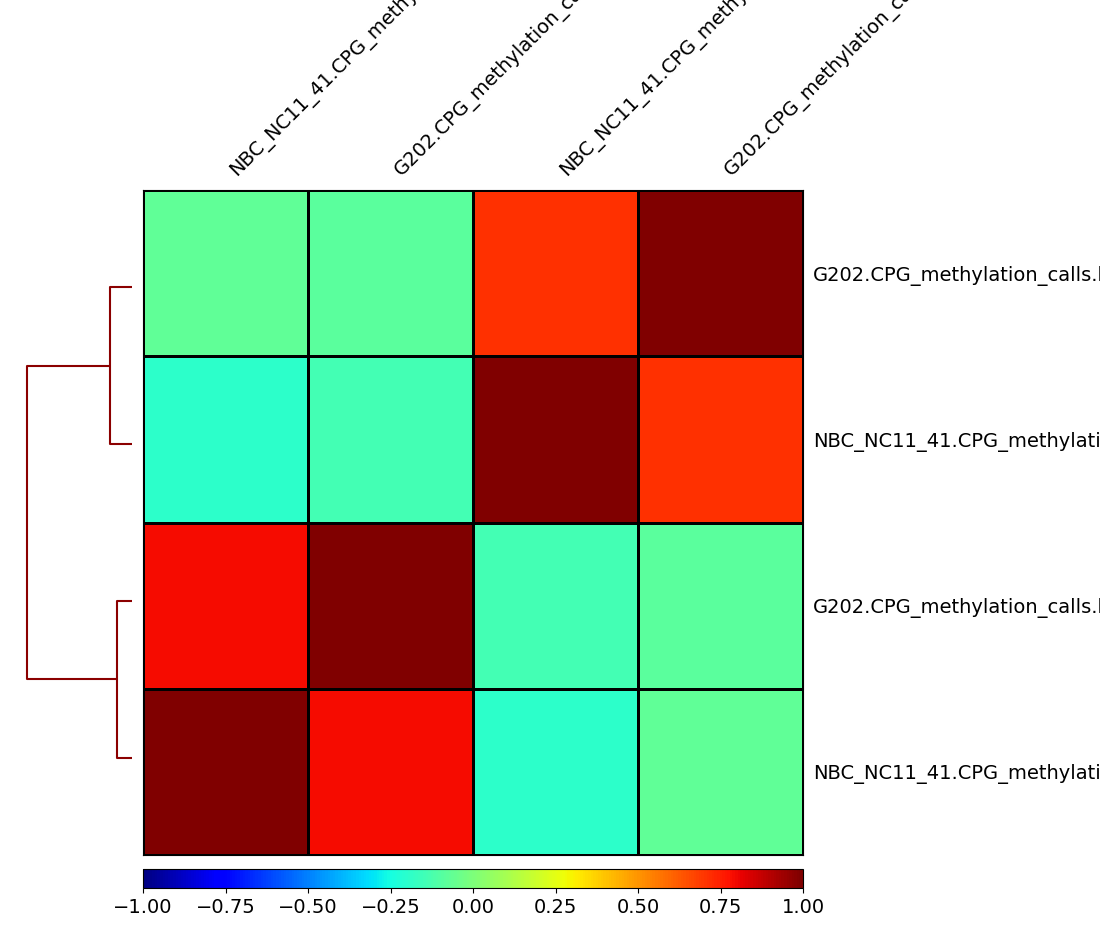

In [ ]:
Image("PearsonCorr_bigwigScores.png")